In [1]:

import glob
import cv2
import torch
import numpy as np
import torch.nn.functional as F

fraction_List = []


def gray_rgb_image_list(filelist):




    rgb_image_list = []
    gray_image_list = []
    for file in filelist:
        image_rgb = cv2.imread(file)
        
        rgb_image_list.append(image_rgb)
        
        gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
        
        gray_image_list.append(gray_image)
    
    return gray_image_list, rgb_image_list
    
filelist = glob.glob('2022/2*.png')

filelist.sort()

gray_image_list, rgb_image_list = gray_rgb_image_list(filelist)

print(len(gray_image_list))


print(gray_image_list[0].shape)




242
(332, 316)


In [2]:
import cv2
import numpy as np

# Load your image
image = cv2.imread(filelist[0])  # Replace 'your_image.jpg' with your image file's path


# Split the image into RGB channels
r, g, b = cv2.split(image)

# Save each channel as a separate text file
np.savetxt('red_channel.txt', r,delimiter='\t',fmt='%d')
np.savetxt('green_channel.txt', g,delimiter='\t',fmt='%d')
np.savetxt('blue_channel.txt', b,delimiter='\t',fmt='%d')


In [3]:


def get_values_fraction_list(gray_image_list):

    get_Value_from_fraction_List = []


    fraction_List = gray_image_list
    for f in range(len(fraction_List)-1):
        
        arr2 = fraction_List[f+1].astype(np.int32)
        arr1 = fraction_List[f].astype(np.int32)
        diff = np.zeros_like(arr2)
        
        row,col = fraction_List[f].shape
        count = 0
        for i in range(row):
            for j in range(col):
                    
                diff[i][j] = arr2[i][j] - arr1[i][j]
                
                
                if(diff[i][j]>0):
                    count += 1
        
        # print(count)
        # print(np.min(diff))
        # print(np.max(diff))

    
        get_Value_from_fraction_List.append(diff)
    

    return get_Value_from_fraction_List
    
    #np.savetxt(files[f+1][-16:-8]+'-'+files[f][-16:-8]+'.txt', diff, delimiter='\t',fmt='%.2f')





In [4]:
import numpy as np

import matplotlib.pyplot as plt

import glob



plot_names = [
    'anomaly_discord.txt'  , 'ss.txt' 
]


def get_anomaly_grid_List_dayList(list_of_files_anomaly_discord,list_of_files_ss,get_Value_from_fraction_List):
   

    


    ################
    pngImageiterator = 1  

    firstImage = rgb_image_list[0]
    ss_negative_List = []
    ss_positive_List = []

    anomaly_positive_List = []
    anomaly_negative_List = []


    ss_grid_negative_List = []
    ss_grid_positive_List = []

    anomaly_grid_positive_List = []
    anomaly_grid_negative_List = []




    dayList = []

    

    for i in range(len(list_of_files_anomaly_discord)):
        
        data_gray_anomaly_discord = np.loadtxt(list_of_files_anomaly_discord[i], delimiter='\t')
        
        data_gray_ss = np.loadtxt(list_of_files_ss[i], delimiter='\t')
            

    
            
        date_name = list_of_files_anomaly_discord[i][62:70]  
        #print(date_name)
        
        
        
        
        
        fraction_anomaly_discord = np.zeros_like(get_Value_from_fraction_List[i])
        

            
        
        temp_array_fraction = get_Value_from_fraction_List[i]
        
    

    
        rows, cols = np.where(data_gray_anomaly_discord > 0)

            # Update the new RGB image with values from the original RGB for those locations
        for r, c in zip(rows, cols):
            fraction_anomaly_discord[r, c] = temp_array_fraction[r, c]
        
        
        
        
        fraction_ss = np.zeros_like(get_Value_from_fraction_List[i])
            
    
            
    
        rows, cols = np.where(data_gray_ss > 0)

            
        for r, c in zip(rows, cols):
            fraction_ss[r, c] = temp_array_fraction[r, c]
            
        
        
        
        positve_anomaly_melting = np.sum(fraction_anomaly_discord > 0) 
        negative_anomaly_melting = np.sum(fraction_anomaly_discord < 0) 
        positive_ss_melting = np.sum(fraction_ss>0)
        negative_ss_melting = np.sum(fraction_ss < 0)   
            
        
        ss_grid_negative_List.append(negative_ss_melting)
        ss_grid_positive_List.append(positive_ss_melting)

        anomaly_grid_positive_List.append(positve_anomaly_melting)
        anomaly_grid_negative_List.append(negative_anomaly_melting)
        
            
            
        ################ disscord and ss accumulating ####################    
            
        
        original_rgb = rgb_image_list[pngImageiterator]
        rows, cols = np.where(fraction_anomaly_discord > 0)
        
        


            # Convert the original RGB to grayscale (using a simple averaging for this example)


            # Create a new RGB image initialized with zeros
        new_rgb_image_anomaly_discord_positive = np.zeros_like(gray_image_list[0])
        

        
        for r, c in zip(rows, cols):
            new_rgb_image_anomaly_discord_positive[r, c] = 1
            
        
        
        rows, cols = np.where(fraction_anomaly_discord < 0)
        
        

        new_rgb_image_anomaly_discord_negative = np.zeros_like(gray_image_list[0])
        

        
        for r, c in zip(rows, cols):
            new_rgb_image_anomaly_discord_negative[r, c] = 1
        
    
    
        
        
        
        rows, cols = np.where(fraction_ss > 0)




        new_rgb_image_ss_positive = np.zeros_like(gray_image_list[0])


            
        for r, c in zip(rows, cols):
            new_rgb_image_ss_positive[r, c] = 1
            


        rows, cols = np.where(fraction_ss < 0)



        new_rgb_image_ss_negative = np.zeros_like(gray_image_list[0])


            
        for r, c in zip(rows, cols):
            new_rgb_image_ss_negative[r, c] = 1
        
        
        
        ss_negative_List.append(new_rgb_image_ss_negative)
        ss_positive_List.append(new_rgb_image_ss_positive)
        anomaly_positive_List.append(new_rgb_image_anomaly_discord_positive)
        anomaly_negative_List.append(new_rgb_image_anomaly_discord_negative)
        
        pngImageiterator +=1
        
    
    
        dayList.append(date_name)
    
        print(date_name)
    

    # print(len(ss_negative_List))
    # print(len(ss_positive_List))
    # print(len(anomaly_positive_List))
    # print(len(anomaly_negative_List))




    # print('anomaly')
    # print(len(anomaly_grid_positive_List))

    # print(len(anomaly_grid_negative_List))


    return anomaly_negative_List, anomaly_grid_negative_List, dayList
     
        

list_of_files_anomaly_discord = glob.glob('anomaly_discord_and_ss_with_IQR_2022'+'/20*/*_'+plot_names[0])

list_of_files_ss = glob.glob('anomaly_discord_and_ss_with_IQR_2022'+'/20*/*_'+plot_names[1])


list_of_files_anomaly_discord.sort()
list_of_files_ss.sort()
print(list_of_files_anomaly_discord)


print('problem')
print(list_of_files_ss)
print(len(list_of_files_ss))

      
#anomaly_negative_List, anomaly_grid_negative_List, dayList = get_anomaly_grid_List_dayList(list_of_files_anomaly_discord,list_of_files_ss)    
        
       
        
    
    
    
    
   
        
        


['anomaly_discord_and_ss_with_IQR_2022/20220902-20220901/2x2_15_20220902-20220901_anomaly_discord.txt', 'anomaly_discord_and_ss_with_IQR_2022/20220903-20220902/2x2_15_20220903-20220902_anomaly_discord.txt', 'anomaly_discord_and_ss_with_IQR_2022/20220904-20220903/2x2_15_20220904-20220903_anomaly_discord.txt', 'anomaly_discord_and_ss_with_IQR_2022/20220905-20220904/2x2_15_20220905-20220904_anomaly_discord.txt', 'anomaly_discord_and_ss_with_IQR_2022/20220906-20220905/2x2_15_20220906-20220905_anomaly_discord.txt', 'anomaly_discord_and_ss_with_IQR_2022/20220907-20220906/2x2_15_20220907-20220906_anomaly_discord.txt', 'anomaly_discord_and_ss_with_IQR_2022/20220908-20220907/2x2_15_20220908-20220907_anomaly_discord.txt', 'anomaly_discord_and_ss_with_IQR_2022/20220909-20220908/2x2_15_20220909-20220908_anomaly_discord.txt', 'anomaly_discord_and_ss_with_IQR_2022/20220910-20220909/2x2_15_20220910-20220909_anomaly_discord.txt', 'anomaly_discord_and_ss_with_IQR_2022/20220911-20220910/2x2_15_20220911-

In [5]:
jj = 'anomaly_discord_and_ss_with_IQR_2022/20220802-20220801/2x2_15_'

print(len(jj))


62


In [6]:
def getSubListIndex(_list):

    result = []

    # Initialize a sublist
    sublist = []

    # Total number of elements
    total_elements = len(_list)

    # Number of elements in each sublist
    elements_per_sublist = 7

    for i in range(total_elements):
        sublist.append(i)
        
        # Check if the sublist has reached its maximum size
        if len(sublist) == elements_per_sublist:
            result.append(sublist)  # Add the sublist to the result
            sublist = []  # Reset the sublist for the next 7 elements

    # Add any remaining elements to the last sublist
    if sublist:
        result.append(sublist)

    
    

    return result


# result = getSubListIndex(210)
# print(result)

In [7]:
import numpy as np

import matplotlib.pyplot as plt




plot_names = [
    'anomaly_discord.txt'  , 'ss.txt' 
]

# To print the list or access it
print(plot_names)





#original_rgb_data = rgb_image_list[0]


def pngImageGenrating(name,_List,anomaly_grid_positive_List,dayList,data_need_to_plot):
    

    updated_dayList = []
    updated_data_need_to_plot_list = []
    
    
    
    result = getSubListIndex(_List)
    for i, sublist in enumerate(result):
        
        
        #for doing weakly
        
        dayHolder= 0
        for j in sublist:
            
  
            data_need_to_plot = data_need_to_plot + _List[j]
            
            
            
            dayHolder = dayList[j]
        updated_data_need_to_plot_list.append(data_need_to_plot)
        updated_dayList.append(dayHolder)
    
           
        
        
      
            
    
    return updated_data_need_to_plot_list, updated_dayList, data_need_to_plot        



        

#anomaly_positive_dataList, anomaly_positive_dayList = pngImageGenrating('positive_anomaly_weekly',anomaly_positive_List,anomaly_grid_positive_List)
#anomaly_negative_dataList, anomaly_negative_dayList = pngImageGenrating('negative_anomaly_weekly',anomaly_negative_List,anomaly_grid_negative_List)
#ss_positive_dataList, ss_positive_dayList = pngImageGenrating('positive_ss_weekly',ss_positive_List,ss_grid_positive_List)
#ss_negative_dataList, ss_negative_dayList = pngImageGenrating('negative_ss_weekly',ss_negative_List,ss_grid_negative_List)

        



['anomaly_discord.txt', 'ss.txt']


In [8]:
import matplotlib.pyplot as plt


colormap = 'jet'

# def plotingFigure(name,data_plot,day_List_ploting):            
            
#     fig, axes = plt.subplots(6, 6, figsize=(100, 100))

    
    
#     #print(len(day_List_ploting))  
        
    
#     for ploting_counter in range(len(day_List_ploting)): 
        
       
                   
#         ax = axes[ploting_counter // 6, ploting_counter % 6] 
        
#         anomalies_grid = data_plot[ploting_counter]
#         ax.imshow(anomalies_grid, cmap=colormap, interpolation='nearest', vmin=0)
#         # ax.set_colorbar(label='Cumulative Count of Anomalies')
        
#         # cbar = plt.colorbar(ax.imshow(anomalies_grid, cmap=colormap, interpolation='nearest', vmin=0), ax=ax)
#         # cbar.set_label('Cumulative Count of Anomalies')
#         ax.tick_params(axis='both', which='major', labelsize=20)
#         ax.set_title(day_List_ploting[ploting_counter], fontsize =60)
        

#         ax.set_xlabel('X')
#         ax.set_ylabel('Y')
    
        

       
#     for kk in range(len(day_List_ploting), 6 * 6):
#         axes[kk // 6, kk % 6].remove()
        
#     cbar_ax = fig.add_axes([0.9, 0.1, 0.02, 0.78])  # Adjust the position and size as needed
#     cbar = fig.colorbar(anomalies_grid, cax=cbar_ax)
    
#     # Customize the colorbar font size and color
#     cbar.ax.tick_params(labelsize=40)  # Adjust the font size as needed
#     cbar.set_label('Cumulative Count of Anomalies', fontsize=280)   
  

#     plt.tight_layout()
#     plt.savefig(name+ 'accumulating_png_image_area_melting_using_Jet_q1_1.5(q3-q1)_only_7_days' + '.png')


import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

colormap = 'jet'

def plotingFigure(name, data_plot, day_List_ploting):            
    fig, axes = plt.subplots(6, 6, figsize=(100, 100))


    print(day_List_ploting)
    
    for ploting_counter in range(len(day_List_ploting)): 
        ax = axes[ploting_counter // 6, ploting_counter % 6] 
        anomalies_grid = data_plot[ploting_counter]
        im = ax.imshow(anomalies_grid, cmap=colormap, interpolation='nearest', vmin=0)
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.set_title(day_List_ploting[ploting_counter], fontsize=80)
        ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        # ax.set_xlabel('X')
        # ax.set_ylabel('Y')

    for kk in range(len(day_List_ploting)-1, 6 * 6):
        axes[kk // 6, kk % 6].remove()
    
    # Create ScalarMappable for colorbar
    sm = ScalarMappable(cmap=colormap)
    sm.set_array(anomalies_grid)
    
    cbar_ax = fig.add_axes([0.9, 0.08, 0.02, 0.8])  # Adjust the position and size as needed
    cbar = fig.colorbar(sm, cax=cbar_ax)
    
    # Customize the colorbar font size and label
    cbar.ax.tick_params(labelsize=140)
    cbar.set_label('Cumulative Count of Anomalies', fontsize=280)
    
   
    plt.savefig(name + 'CMAD_only_7_days' + '.png', bbox_inches='tight')




















#plotingFigure('anomaly_negative_'+str(2022),anomaly_negative_dataList, anomaly_negative_dayList) 


In [9]:
import matplotlib.pyplot as plt

def cummalative_anomaloyus(name,anomalies_grid):
    plt.figure(figsize=(12, 6))
    plt.imshow(anomalies_grid, cmap='jet', interpolation='nearest', vmin =0)  # vmin set to 1 to leave 0 values as black

    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=20)
    plt.title('Cumulative Anomalous Events from CMAD',fontsize=15)
    plt.xlabel('X', fontsize=25)
    plt.ylabel('Y', fontsize=25)
    plt.rc('xtick', labelsize=24)
    plt.rc('ytick', labelsize=24) 


    #plt.tight_layout()
    plt.savefig(name+'grid_negative_anomalies_final' + '.png', bbox_inches='tight')


import datetime
from datetime import date
from datetime import timedelta


ultimate_date_List = []
ultimate_anomaly_per_day_list = []

def number_of_neagtive_anomalies(year_input,anomaly_grid_negative_List):

        Y=year_input; 
        M=9.0; 
        D=2.0
        

        anomalies_per_day = anomaly_grid_negative_List
     
        f_date = date(int(Y),int(M),int(D))
        dateList = []
        for i in range (len(anomalies_per_day)):
                x=i
                date1=f_date+timedelta(days=x)
                mon=date1.month
                yr=date1.year
                day=date1.day
                dateList.append(f_date + datetime.timedelta(days = x))
                ultimate_date_List.append(f_date + datetime.timedelta(days = x))
                ultimate_anomaly_per_day_list.append(anomalies_per_day[i])
                
        plt.figure(figsize=(12, 6))

        print(dateList)
        plt.bar(dateList, anomalies_per_day,color='skyblue',  alpha= 1.0, linestyle='solid',
        linewidth=1,edgecolor='black')
        #plt.xlabel('Days from 09012022', fontsize=20)
        plt.ylabel('Number of Negative Anomalies', fontsize=20)
        plt.xticks(rotation=30)
        plt.title('Daily Negative Anomalies with 1.5$IQR$', fontsize=15)

        plt.xticks(fontsize = 30)
        plt.yticks(fontsize=30)
        #plt.tight_layout()
        #plt.savefig(str(year_input)+'number_of_neagtive_anomalies_15_IQR' + '.png', bbox_inches='tight')





def plotingFigure_row_wise(name, data_plot, day_List_ploting):   

    filtered_dates = ['20220908', '20221006', '20221103', '20221201', '20230105', '20230202', '20230302', '20230406', '20230427']
    fig, axes = plt.subplots(1, len(filtered_dates), figsize=(50, 25))

    for col, date in enumerate(filtered_dates):
        ax = axes[col]  # Single row for images
        anomalies_grid = data_plot[day_List_ploting.index(date)]
        im = ax.imshow(anomalies_grid, cmap=colormap, interpolation='nearest', vmin=0)
        ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        ax.set_title(date, fontsize=30)

    # Create ScalarMappable for colorbar
    sm = ScalarMappable(cmap=colormap)
    sm.set_array(anomalies_grid)

    # Add a single colorbar just below the subplots
    cbar_ax = fig.add_axes([0.12, 0.38, 0.8, 0.02])  # Adjust the position and size as needed
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
    cbar.ax.tick_params(labelsize=40)
    cbar.set_label('Cumulative Count of Anomalies', fontsize=80)

    plt.savefig(name + 'CMAD_only_selected_days_with_colorbar_in_separate_row' + '.png', bbox_inches='tight')

20220902
20220903
20220904
20220905
20220906
20220907
20220908
20220909
20220910
20220911
20220912
20220913
20220914
20220915
20220916
20220917
20220918
20220919
20220920
20220921
20220922
20220923
20220924
20220925
20220926
20220927
20220928
20220929
20220930
20221001
20221002
20221003
20221004
20221005
20221006
20221007
20221008
20221009
20221010
20221011
20221012
20221013
20221014
20221015
20221016
20221017
20221018
20221019
20221020
20221021
20221022
20221023
20221024
20221025
20221026
20221027
20221028
20221029
20221030
20221031
20221101
20221102
20221103
20221104
20221105
20221106
20221107
20221108
20221109
20221110
20221111
20221112
20221113
20221114
20221115
20221116
20221117
20221118
20221119
20221120
20221121
20221122
20221123
20221124
20221125
20221126
20221127
20221128
20221129
20221130
20221201
20221202
20221203
20221204
20221205
20221206
20221207
20221208
20221209
20221210
20221211
20221212
20221213
20221214
20221215
20221216
20221217
20221218
20221219
20221220
20221221
2

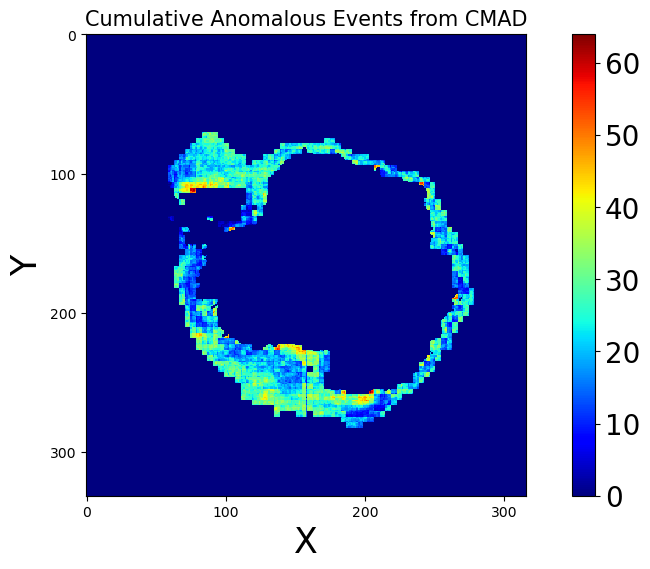

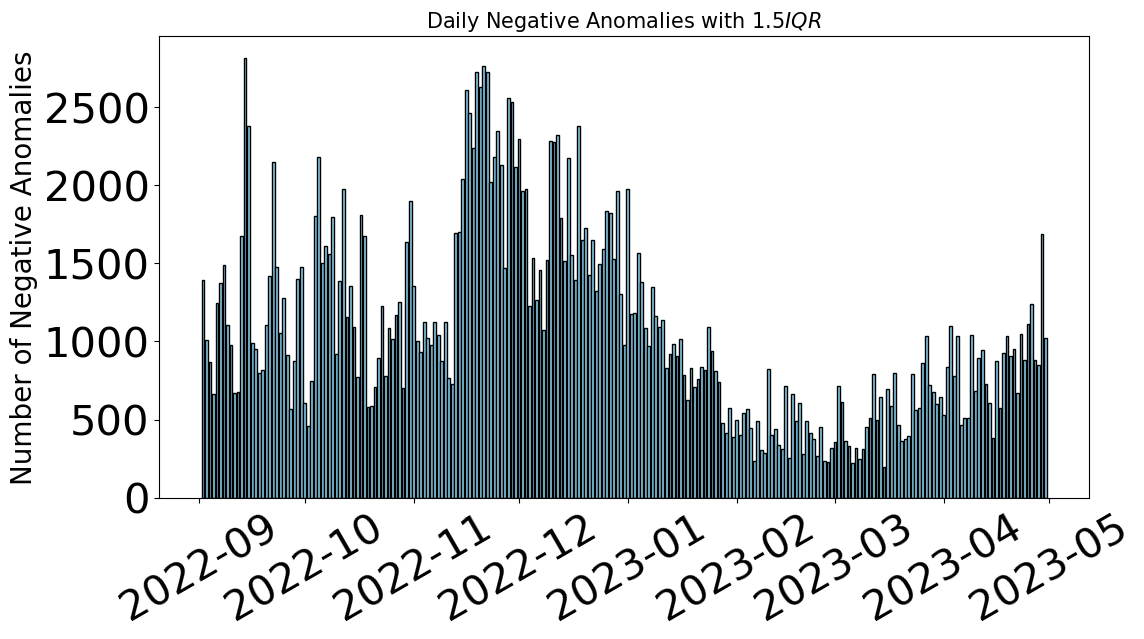

In [10]:
year_sums = {}
data_need_to_plot =  np.zeros_like(gray_image_list[0])  
for year_interger in range(2022,2023,1):


    filelist = glob.glob(str(year_interger)+'/2*.png')

    filelist.sort()

    gray_image_list, rgb_image_list = gray_rgb_image_list(filelist)
        
    get_Value_from_fraction_List = get_values_fraction_list(gray_image_list)
    #print(len(get_Value_from_fraction_List))




    list_of_files_anomaly_discord = glob.glob('anomaly_discord_and_ss_with_IQR_'+str(year_interger)+'/20*/*_'+plot_names[0])

    list_of_files_ss = glob.glob('anomaly_discord_and_ss_with_IQR_'+str(year_interger)+'/20*/*_'+plot_names[1])


    list_of_files_anomaly_discord.sort()
    list_of_files_ss.sort()
  

    data_need_to_plot =  np.zeros_like(gray_image_list[0])    
    anomaly_negative_List, anomaly_grid_negative_List, dayList = get_anomaly_grid_List_dayList(list_of_files_anomaly_discord,list_of_files_ss,get_Value_from_fraction_List)
    anomaly_negative_dataList, anomaly_negative_dayList, data_need_to_plot = pngImageGenrating('negative_anomaly_weekly',anomaly_negative_List,anomaly_grid_negative_List,dayList, data_need_to_plot)
    plotingFigure('anomaly_negative_'+str(year_interger),anomaly_negative_dataList, anomaly_negative_dayList)
    cummalative_anomaloyus(str(year_interger)+'_',anomaly_negative_dataList[len(anomaly_negative_dataList)-1]) 
    # print('sjfhjshfshds')
    # #ultimate_date_List.append(anomaly_negative_dayList)
    # #print(anomaly_negative_dayList[len(anomaly_negative_dataList)-1])
    # print(year_interger)
    # year_sums[year_interger]=np.sum(anomaly_grid_negative_List)
    number_of_neagtive_anomalies(year_interger,anomaly_grid_negative_List)

In [11]:
# plt.figure(figsize=(12, 6))


# dateList = ultimate_date_List
# anomalies_per_day = ultimate_anomaly_per_day_list


# size_always = 25
# plt.bar(dateList, anomalies_per_day,color='skyblue',  alpha= 1.0, linestyle='solid',
# linewidth=1,edgecolor='blue')
# plt.xlabel('Year', fontsize=size_always)
# plt.ylabel('Number of Negative Anomalies', fontsize=size_always)
# plt.xticks(rotation=30)

# plt.xticks(fontsize = size_always)
# plt.yticks(fontsize=size_always)
# plt.tight_layout()
# plt.savefig('number_of_neagtive_anomalies' + '.png')

In [12]:
#np.savetxt('anomalies_per_day.txt', anomalies_per_day,delimiter='\t',fmt='%d')

In [13]:

print(ultimate_date_List)
    

[datetime.date(2022, 9, 2), datetime.date(2022, 9, 3), datetime.date(2022, 9, 4), datetime.date(2022, 9, 5), datetime.date(2022, 9, 6), datetime.date(2022, 9, 7), datetime.date(2022, 9, 8), datetime.date(2022, 9, 9), datetime.date(2022, 9, 10), datetime.date(2022, 9, 11), datetime.date(2022, 9, 12), datetime.date(2022, 9, 13), datetime.date(2022, 9, 14), datetime.date(2022, 9, 15), datetime.date(2022, 9, 16), datetime.date(2022, 9, 17), datetime.date(2022, 9, 18), datetime.date(2022, 9, 19), datetime.date(2022, 9, 20), datetime.date(2022, 9, 21), datetime.date(2022, 9, 22), datetime.date(2022, 9, 23), datetime.date(2022, 9, 24), datetime.date(2022, 9, 25), datetime.date(2022, 9, 26), datetime.date(2022, 9, 27), datetime.date(2022, 9, 28), datetime.date(2022, 9, 29), datetime.date(2022, 9, 30), datetime.date(2022, 10, 1), datetime.date(2022, 10, 2), datetime.date(2022, 10, 3), datetime.date(2022, 10, 4), datetime.date(2022, 10, 5), datetime.date(2022, 10, 6), datetime.date(2022, 10, 7),

In [14]:
# from datetime import date
# import numpy as np

# # Example list of date objects
# dates = ultimate_date_List

# # Convert date objects to strings
# date_strings = [date_obj.strftime('%Y-%m-%d') for date_obj in dates]

# # Save the list of date strings to a text file
# np.savetxt('dates.txt', date_strings, fmt='%s')


In [15]:

print(year_sums)
# Sample dictionary
#year_sums ={2000: 533132, 2001: 545419, 2002: 557331, 2003: 555450, 2004: 558606, 2005: 566093, 2006: 549479, 2007: 553303, 2008: 567717, 2009: 570015, 2010: 557930, 2011: 579819, 2012: 554672, 2013: 564552, 2014: 563326, 2015: 565268, 2016: 549926, 2017: 556793, 2018: 545702, 2019: 561739, 2020: 568099, 2021: 547626, 2022: 570889}

# Sort the dictionary based on values
sorted_year_sums = dict(sorted(year_sums.items(), key=lambda item: item[1]))

# Print the sorted dictionary
for year, year_sum in sorted_year_sums.items():
    print(f"Year: {year}, Sum: {year_sum}")

{}


{}
[]
[]


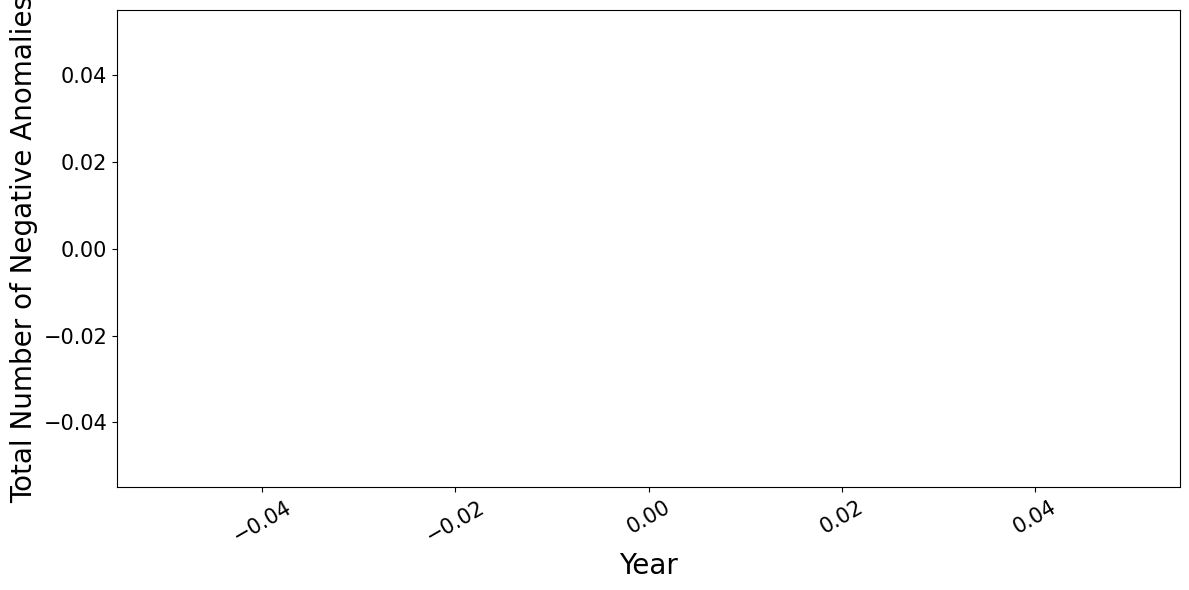

In [16]:
import matplotlib.pyplot as plt

sorted_year_sums = year_sums  #dict(sorted(year_sums.items(), key=lambda item: item[1]))
print(sorted_year_sums)
# Extract keys (years) and values (total number of negative anomalies)
years = list(sorted_year_sums.keys())
anomalies_per_year = list(sorted_year_sums.values())


print(years)
print(anomalies_per_year)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.plot(years, anomalies_per_year, color='skyblue', alpha=1.0, linestyle='solid', linewidth=1)

# Setting labels and formatting
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Number of Negative Anomalies', fontsize=20)
plt.xticks(rotation=30, fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

# Save the plot as an image
plt.savefig('total_number_of_negative_anomalies.png')

# Show the plot
plt.show()



{2000: 250002, 2001: 246219, 2002: 253762, 2003: 256918, 2004: 255025, 2005: 257212, 2006: 254219, 2007: 256288, 2008: 250250, 2009: 255988, 2010: 237656, 2011: 258476, 2012: 255724, 2013: 258238, 2014: 244366, 2015: 249059, 2016: 247759, 2017: 250156, 2018: 242642, 2019: 262215, 2020: 256334, 2021: 242029, 2022: 250032}
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
[250002, 246219, 253762, 256918, 255025, 257212, 254219, 256288, 250250, 255988, 237656, 258476, 255724, 258238, 244366, 249059, 247759, 250156, 242642, 262215, 256334, 242029, 250032]


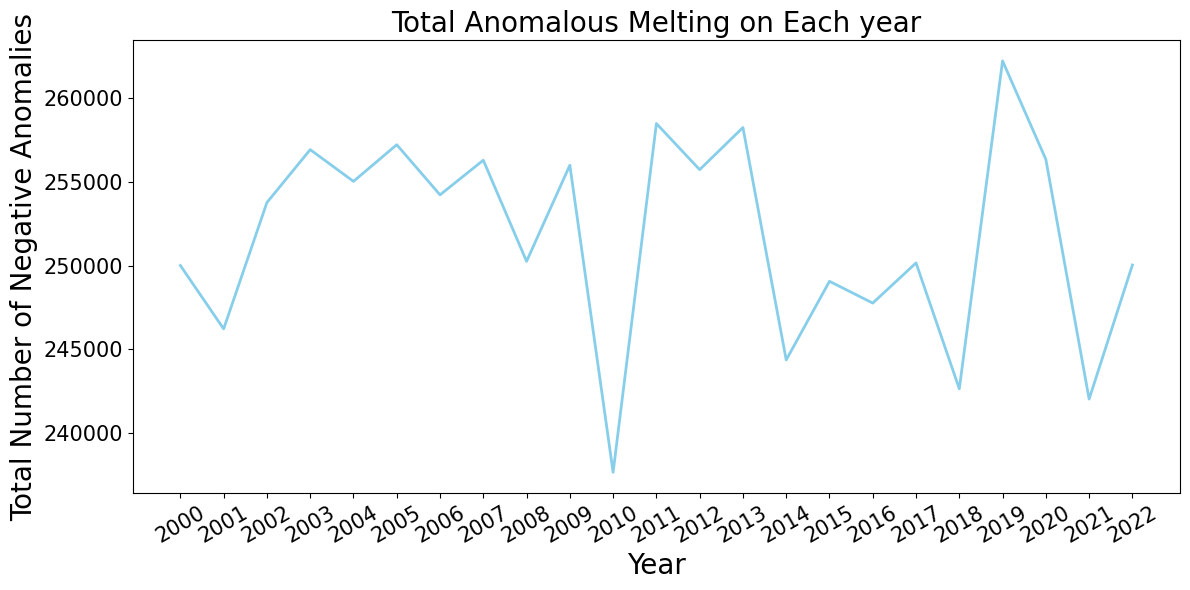

In [17]:
year_sums = {2000: 250002, 2001: 246219, 2002: 253762, 2003: 256918, 2004: 255025, 2005: 257212, 2006: 254219, 2007: 256288, 2008: 250250, 2009: 255988, 2010: 237656, 2011: 258476, 2012: 255724, 2013: 258238, 2014: 244366, 2015: 249059, 2016: 247759, 2017: 250156, 2018: 242642, 2019: 262215, 2020: 256334, 2021: 242029, 2022: 250032}

import matplotlib.pyplot as plt

sorted_year_sums = year_sums  # dict(sorted(year_sums.items(), key=lambda item: item[1]))
print(sorted_year_sums)

# Extract keys (years) and values (total number of negative anomalies)
years = list(sorted_year_sums.keys())
anomalies_per_year = list(sorted_year_sums.values())

print(years)
print(anomalies_per_year)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.plot(years, anomalies_per_year, color='skyblue', alpha=1.0, linestyle='solid', linewidth=2)

# Setting labels and formatting
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Number of Negative Anomalies', fontsize=20)
plt.title('Total Anomalous Melting on Each year', fontsize=20)
plt.xticks(years, rotation=30, fontsize=15)  # Set tick locations and labels
plt.yticks(fontsize=15)
plt.tight_layout()

# Save the whole figure as an image
plt.savefig('total_number_of_negative_anomalies.png',bbox_inches = 'tight')

# Show the plot
plt.show()





In [18]:

# import matplotlib.pyplot as plt

# sorted_year_sums = dict(sorted(year_sums.items(), key=lambda item: item[1]))
# print(sorted_year_sums)
# # Extract keys (years) and values (total number of negative anomalies)
# years = list(sorted_year_sums.keys())
# anomalies_per_year = list(sorted_year_sums.values())


# print(years)
# print(anomalies_per_year)

# # Plotting the bar chart
# plt.figure(figsize=(12, 6))
# plt.plot(years, anomalies_per_year, color='skyblue', alpha=1.0, linestyle='solid', linewidth=1, edgecolor='black')

# # Setting labels and formatting
# plt.xlabel('Year', fontsize=20)
# plt.ylabel('Total Number of Negative Anomalies', fontsize=20)
# plt.xticks(rotation=30, fontsize=15)
# plt.yticks(fontsize=15)
# plt.tight_layout()

# # Save the plot as an image
# plt.savefig('total_number_of_negative_anomalies.png')

# # Show the plot
# plt.show()

In [19]:

# data_need_to_plot =  np.zeros_like(gray_image_list[0])  
# for year_interger in range(2018,2020):


#     filelist = glob.glob(str(year_interger)+'/2*.png')

#     filelist.sort()

#     gray_image_list, rgb_image_list = gray_rgb_image_list(filelist)
        
#     get_Value_from_fraction_List = get_values_fraction_list(gray_image_list)
#     print(len(get_Value_from_fraction_List))




#     list_of_files_anomaly_discord = glob.glob('anomaly_discord_and_ss_with_IQR_'+str(year_interger)+'/20*/*_'+plot_names[0])

#     list_of_files_ss = glob.glob('anomaly_discord_and_ss_with_IQR_'+str(year_interger)+'/20*/*_'+plot_names[1])


#     list_of_files_anomaly_discord.sort()
#     list_of_files_ss.sort()
  

     
#     anomaly_negative_List, anomaly_grid_negative_List, dayList = get_anomaly_grid_List_dayList(list_of_files_anomaly_discord,list_of_files_ss,get_Value_from_fraction_List)
#     anomaly_negative_dataList, anomaly_negative_dayList, data_need_to_plot = pngImageGenrating('negative_anomaly_weekly',anomaly_negative_List,anomaly_grid_negative_List,dayList, data_need_to_plot)
    

In [20]:
# import matplotlib.pyplot as plt


# colormap = 'Purples'

# def plotingFigure(name,data_plot,day_List_ploting):            
            
#     fig, axes = plt.subplots(18, 7, figsize=(100, 100))
    
#     print(len(day_List_ploting))        
    
#     for ploting_counter in range(len(day_List_ploting)): 
        
       
                   
#         ax = axes[ploting_counter // 7, ploting_counter % 7] 
        
#         anomalies_grid = data_plot[ploting_counter]
#         # ax.imshow(anomalies_grid, cmap=colormap, interpolation='nearest', vmin=1)
#         # ax.set_colorbar(label='Cumulative Count of Anomalies')
        
#         cbar = plt.colorbar(ax.imshow(anomalies_grid, cmap=colormap, interpolation='nearest', vmin=0), ax=ax)
#         cbar.set_label('Cumulative Count of Anomalies')
#         ax.set_title(name + '_up_to_day_'+day_List_ploting[ploting_counter] +' Anomalies at Each Grid Cell around Antarctica')
#         ax.set_xlabel('Longitude (x)')
#         ax.set_ylabel('Latitude (y)')
       
#     for kk in range(len(day_List_ploting), 18 * 7):
#         axes[kk // 7, kk % 7].remove()
        
        
  

#     plt.tight_layout()
#     plt.savefig(name+ 'accumulating_png_image_area_melting_using_purple' + '.png')



# plotingFigure('anomaly_positive',anomaly_positive_dataList, anomaly_positive_dayList)
# plotingFigure('anomaly_negative',anomaly_negative_dataList, anomaly_negative_dayList) 
# plotingFigure('ss_positive',ss_positive_dataList, ss_positive_dayList) 
# plotingFigure('ss_negative',ss_negative_dataList, ss_negative_dayList) 


In [21]:
            
# def plotingFigure(name,data_plot,day_List_ploting):            
            
#     fig, axes = plt.subplots(13, 10, figsize=(50, 50))
    
#     print(len(day_List_ploting))        
    
#     for ploting_counter in range(len(day_List_ploting)): 
        
#         print(ploting_counter // 10, ploting_counter % 10)
                   
#         ax = axes[ploting_counter // 10, ploting_counter % 10] 
#         image_rgb = cv2.cvtColor(data_plot[ploting_counter], cv2.COLOR_BGR2RGB)
#         ax.imshow(image_rgb, vmin=0, vmax=255)
#         ax.axis('off')
#         ax.set_title(name + '_up_to_day_' + day_List_ploting[ploting_counter]+'_area_melting')
#     for kk in range(len(day_List_ploting), 13 * 10):
#         axes[kk // 10, kk % 10].remove()
        
        
  

#     plt.tight_layout()
#     plt.savefig(name+ 'weekly_rgb_with_area_melting_only_blue_accumulating' + '.png')



# plotingFigure('anomaly_positive',anomaly_positive_dataList, anomaly_positive_dayList)
# plotingFigure('anomaly_negative',anomaly_negative_dataList, anomaly_negative_dayList) 
# plotingFigure('ss_positive',ss_positive_dataList, ss_positive_dayList) 
# plotingFigure('ss_negative',ss_negative_dataList, ss_negative_dayList) 